In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.mlab
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [10]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
    df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

df.dropna(inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

In [12]:
df["overall_score"] = (df["GRADES_4_G"]*((df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"])*0.5) + df["GRADES_8_G"]
                                 * ((df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"])*0.5))/(df["GRADES_4_G"] + df["GRADES_8_G"])
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,overall_score
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,235.106342
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638,238.321404
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590,240.773675
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,234.719834
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154,247.750273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640,259.594501
1488,2017_WASHINGTON,WASHINGTON,2017,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778,255.009879
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023,249.950079
1490,2017_WISCONSIN,WISCONSIN,2017,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304,251.726455


In [21]:
df1 = df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE",
        "CAPITAL_OUTLAY_EXPENDITURE"]]
df1

,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
209,235.106342,3572283.0,1987018.0,935115.0,322883.0,286699.0
211,238.321404,4391555.0,1860007.0,1193260.0,220650.0,877190.0
212,240.773675,2297381.0,1264275.0,636106.0,127007.0,203555.0
213,234.719834,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0
214,247.750273,4075165.0,2052264.0,1127563.0,143767.0,588209.0
...,...,...,...,...,...,...
1487,259.594501,16113212.0,8755896.0,5075509.0,627473.0,1086722.0
1488,255.009879,13630138.0,6508964.0,4510672.0,546926.0,1601069.0
1489,249.950079,3466981.0,1819903.0,1161944.0,233836.0,232738.0
1490,251.726455,11553677.0,5723474.0,3691809.0,513402.0,894823.0


instructor expenditure is most correlated to the overall average score, but barely moreso than total and support service expenditures

In [14]:
df1.corr()

,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.074155,0.087386,0.079002,0.010959,-0.005389
TOTAL_EXPENDITURE,0.074155,1.000000,0.990255,0.992988,0.943702,0.925784
INSTRUCTION_EXPENDITURE,0.087386,0.990255,1.000000,0.974399,0.902173,0.884798
SUPPORT_SERVICES_EXPENDITURE,0.079002,0.992988,0.974399,1.000000,0.952282,0.911245
OTHER_EXPENDITURE,0.010959,0.943702,0.902173,0.952282,1.000000,0.918188
CAPITAL_OUTLAY_EXPENDITURE,-0.005389,0.925784,0.884798,0.911245,0.918188,1.000000


In [27]:
X = df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]
X = StandardScaler().fit_transform(X)

Xt = X.T
Cx = np.cov(Xt)
Cx

array([[1.00215054, 0.97649399, 0.90411344, 0.88670093],
       [0.97649399, 1.00215054, 0.95433021, 0.91320483],
       [0.90411344, 0.95433021, 1.00215054, 0.92016275],
       [0.88670093, 0.91320483, 0.92016275, 1.00215054]])

In [28]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.49872077 -0.508884   -0.50012988 -0.49212272]
Eigenvalue 1: 3.780181969517264
----------------------------------------
Eigenvector 2: 
[-0.51731724  0.79350501 -0.31927696  0.02819378]
Eigenvalue 2: 0.013995308419871413
----------------------------------------
Eigenvector 3: 
[-0.5998946  -0.31891698  0.24059869  0.69320322]
Eigenvalue 3: 0.1340448210299461
----------------------------------------
Eigenvector 4: 
[ 0.35183367 -0.09838106 -0.76814361  0.52582282]
Eigenvalue 4: 0.08038005157055578
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.9430175  0.00349132 0.03343929 0.02005189]


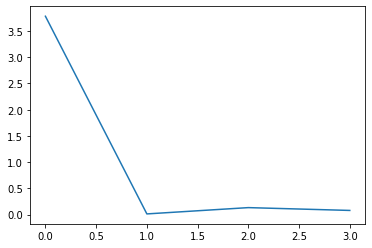

[3.78018197 0.01399531 0.13404482 0.08038005]


In [29]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [43]:
sklearn_pca = PCA(n_components=1)
df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by the first component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by the first component from Sklearn PCA.
 [0.9430175]


In [44]:
df["pca_1"]

209    -0.939455
211    -0.802867
212    -1.219663
213     3.646088
214    -0.958451
          ...   
1487    0.595097
1488    0.469425
1489   -1.012990
1490    0.044108
1491   -1.248006
Name: pca_1, Length: 466, dtype: float64

In [45]:
df[["overall_score", "pca_1"]].corr()

,overall_score,pca_1
overall_score,1.000000,0.044596
pca_1,0.044596,1.000000


the correlation of overall score with the first component is worse than the overall score with some of the specific expenditure variables, such as instruction and support services.

No, instruction expenditure is better correlated.